In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
titanic =pd.read_csv("train.csv")


In [3]:
#explore data 
print(titanic.head(10))
print(titanic.info())
print(titanic.describe())
print(titanic.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [4]:
#data cleaning
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic = titanic.drop('Cabin',axis = 1,errors = 'ignore')
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
titanic['Embarked'] = titanic['Embarked'].astype('category')

C:\Users\youss\AppData\Local\Temp\ipykernel_2564\2938566875.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)


In [5]:
#summary statistics
summary = titanic.describe()
survival_sex = titanic.groupby('Sex')['Survived'].mean()
survival_age = titanic.groupby('Age')['Survived'].median()
print(survival_sex,survival_age)


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64 Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 89, dtype: float64


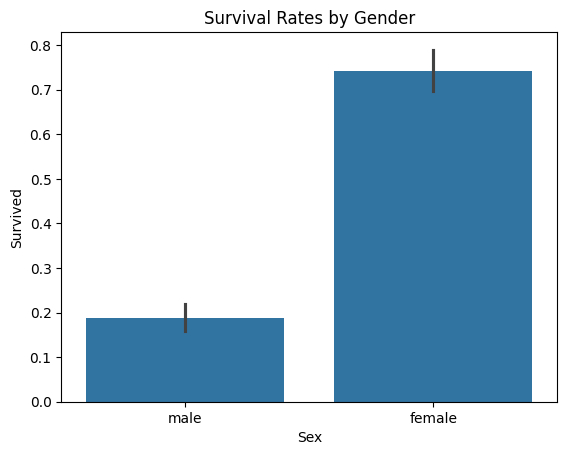

In [6]:
# Bar plot for survival rates by gender
sns.barplot(x='Sex', y='Survived', data = titanic)
plt.title('Survival Rates by Gender')
plt.show()

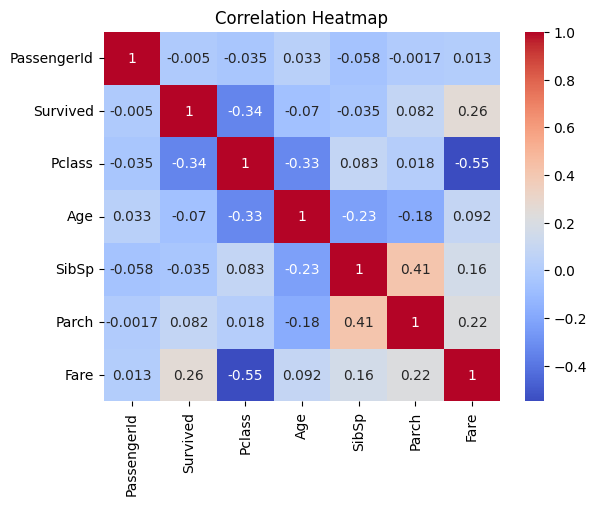

In [7]:
# Heatmap for correlation matrix
titanic_filtered = titanic.drop(columns=['Name', 'Ticket','Embarked','Sex'])
correlation_matrix = titanic_filtered.corr()
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()